<a href="https://colab.research.google.com/github/feliciakiani/PolitikPedia/blob/main/Machine%20Learning/Text_classification_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import dataset
from google.colab import files
uploaded = files.upload()


Saving sentences.txt to sentences.txt


In [ ]:
#splitting data
data = pd.read_csv('preprocessed_indonesian_toxic_tweet_fixed.csv')

# Assuming the columns are named as per your specification
columns = [
    'tweet', 'label_HS', 'label_Abusive', 'label_HS_Individual', 'label_HS_Group',
    'label_HS_Religion', 'label_HS_Race', 'label_HS_Physical', 'label_HS_Gender',
    'label_HS_Other', 'label_HS_Weak', 'label_HS_Moderate', 'label_HS_Strong'
]

# Rename columns for clarity
data.columns = columns

# Assuming 'sentence' is the column containing preprocessed sentences
X = data['tweet']

# Assuming other columns are labels
y = data.drop('tweet', axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create new DataFrames for training and testing data
train_data = pd.DataFrame({'text': X_train})
train_data = pd.concat([train_data, y_train], axis=1)

test_data = pd.DataFrame({'text': X_test})
test_data = pd.concat([test_data, y_test], axis=1)

# Save the training and testing DataFrames to CSV
train_data.to_csv('/content/drive/MyDrive/training_data.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/test_data.csv', index=False)

With cross_validation dataset

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

#splitting data
data = pd.read_csv('preprocessed_indonesian_toxic_tweet_fixed.csv')

# Assuming the columns are named as per your specification
columns = [
    'tweet', 'label_HS', 'label_Abusive', 'label_HS_Individual', 'label_HS_Group',
    'label_HS_Religion', 'label_HS_Race', 'label_HS_Physical', 'label_HS_Gender',
    'label_HS_Other', 'label_HS_Weak', 'label_HS_Moderate', 'label_HS_Strong'
]

# Rename columns for clarity
data.columns = columns

# Assuming 'tweet' is the column containing preprocessed sentences
X = data['tweet']

# Assuming other columns are labels
y = data.drop('tweet', axis=1)

# Split the data into training, cross-validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create new DataFrames for training, cross-validation, and testing data
train_data = pd.DataFrame({'text': X_train})
train_data = pd.concat([train_data, y_train], axis=1)

cv_data = pd.DataFrame({'text': X_cv})
cv_data = pd.concat([cv_data, y_cv], axis=1)

test_data = pd.DataFrame({'text': X_test})
test_data = pd.concat([test_data, y_test], axis=1)

# Save the training, cross-validation, and testing DataFrames to CSV
train_data.to_csv('/content/drive/MyDrive/training_data_2.csv', index=False)
cv_data.to_csv('/content/drive/MyDrive/cv_data.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/test_data_2.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Print information about the training and testing datasets
print("\nShape of the training dataset:", train_data.shape)
print("Shape of the testing dataset:", test_data.shape)
#print("Shape of the cross_Validation dataset:", cv_data.shape)


Shape of the training dataset: (10564, 13)
Shape of the testing dataset: (2642, 13)


In [ ]:
print(train_data.head(15))

                                                    text  label_HS  \
2239                    pintar bacot ya lawan nya bu sri         1   
11539  eh nurul kuliah jurus bahasa mandarin bera i k...         0   
6850                                          edan marah         0   
4295        inti dukung prabowo partai komunis indonesia         1   
1042     ayat kaji pengga kepala pancung ujung jari 8 12         1   
2389                            kocok memek enak kali ya         0   
8270          pas lihat goeun kayak asing oh nyata minho         0   
1592   mafia wasit milanisti asing juventini senior a...         0   
2391   lo kritik kritik solusi surat pemberitahuan co...         0   
3592                                               burik         1   
4007                                 ya rezim anti islam         1   
9750                 hantu kak limah 2 amp munafik 2 hem         0   
10632  copy paste nusantara islam freefo newmont indo...         0   
12809  kamis malam r

In [ ]:
#optional if u want to download the data
from google.colab import files

# Assuming the paths to the training and testing CSV files
training_data_path = '/content/drive/MyDrive/training_data.csv'
test_data_path = '/content/drive/MyDrive/test_data.csv'

# Download the training dataset
files.download(training_data_path)

# Download the testing dataset
files.download(test_data_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import csv

def parse_data_from_file(file_path):
    sentences = []
    labels_HS = []
    labels_Abusive = []
    labels_HS_Individual = []
    labels_HS_Group = []
    labels_HS_Religion = []
    labels_HS_Race = []
    labels_HS_Physical = []
    labels_HS_Gender = []
    labels_HS_Other = []
    labels_HS_Weak = []
    labels_HS_Moderate = []
    labels_HS_Strong = []

    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader, None)  # Skip the header

        for row in reader:
            sentence = row[0]
            label_HS = int(row[1])
            label_Abusive = int(row[2])
            label_HS_Individual = int(row[3])
            label_HS_Group = int(row[4])
            label_HS_Religion = int(row[5])
            label_HS_Race = int(row[6])
            label_HS_Physical = int(row[7])
            label_HS_Gender = int(row[8])
            label_HS_Other = int(row[9])
            label_HS_Weak = int(row[10])
            label_HS_Moderate = int(row[11])
            label_HS_Strong = int(row[12])

            # Append data to respective lists
            sentences.append(sentence)
            labels_HS.append(label_HS)
            labels_Abusive.append(label_Abusive)
            labels_HS_Individual.append(label_HS_Individual)
            labels_HS_Group.append(label_HS_Group)
            labels_HS_Religion.append(label_HS_Religion)
            labels_HS_Race.append(label_HS_Race)
            labels_HS_Physical.append(label_HS_Physical)
            labels_HS_Gender.append(label_HS_Gender)
            labels_HS_Other.append(label_HS_Other)
            labels_HS_Weak.append(label_HS_Weak)
            labels_HS_Moderate.append(label_HS_Moderate)
            labels_HS_Strong.append(label_HS_Strong)

    return (sentences, labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
            labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender,
            labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong)


In [ ]:
#Training data
sentences, labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group, labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender, labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong = parse_data_from_file('/content/drive/MyDrive/training_data.csv')

#test data
test_sentences, test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender, test_labels_HS_Other, test_labels_HS_Weak, test_labels_HS_Moderate, test_labels_HS_Strong = parse_data_from_file('/content/drive/MyDrive/test_data.csv')

In [ ]:
# Print the first few sentences
print(sentences[:10])  # Adjust the number to view a different subset

# Or loop through and print all sentences
for sentence in sentences[:10]:
    print(sentence)

['pintar bacot ya lawan nya bu sri', 'eh nurul kuliah jurus bahasa mandarin bera i kerja komunis saudara gera 30 september partai komunis indonesia', 'edan marah', 'inti dukung prabowo partai komunis indonesia', 'ayat kaji pengga kepala pancung ujung jari 8 12', 'kocok memek enak kali ya', 'pas lihat goeun kayak asing oh nyata minho', 'mafia wasit milanisti asing juventini senior angkat gue', 'lo kritik kritik solusi surat pemberitahuan contoh pimpin kritik bilang terima kasih pimpin kayak indonesia beres', 'burik']
pintar bacot ya lawan nya bu sri
eh nurul kuliah jurus bahasa mandarin bera i kerja komunis saudara gera 30 september partai komunis indonesia
edan marah
inti dukung prabowo partai komunis indonesia
ayat kaji pengga kepala pancung ujung jari 8 12
kocok memek enak kali ya
pas lihat goeun kayak asing oh nyata minho
mafia wasit milanisti asing juventini senior angkat gue
lo kritik kritik solusi surat pemberitahuan contoh pimpin kritik bilang terima kasih pimpin kayak indonesia

Optional dengan Cross validation set


In [ ]:
# Training data.
sentences_train, labels_HS_train, labels_Abusive_train, labels_HS_Individual_train, labels_HS_Group_train, labels_HS_Religion_train, labels_HS_Race_train, labels_HS_Physical_train, labels_HS_Gender_train, labels_HS_Other_train, labels_HS_Weak_train, labels_HS_Moderate_train, labels_HS_Strong_train = parse_data_from_file('/content/drive/MyDrive/training_data_2.csv')

# Cross-validation data
sentences_cv, labels_HS_cv, labels_Abusive_cv, labels_HS_Individual_cv, labels_HS_Group_cv, labels_HS_Religion_cv, labels_HS_Race_cv, labels_HS_Physical_cv, labels_HS_Gender_cv, labels_HS_Other_cv, labels_HS_Weak_cv, labels_HS_Moderate_cv, labels_HS_Strong_cv = parse_data_from_file('/content/drive/MyDrive/cv_data.csv')

# Test data
sentences_test, labels_HS_test, labels_Abusive_test, labels_HS_Individual_test, labels_HS_Group_test, labels_HS_Religion_test, labels_HS_Race_test, labels_HS_Physical_test, labels_HS_Gender_test, labels_HS_Other_test, labels_HS_Weak_test, labels_HS_Moderate_test, labels_HS_Strong_test = parse_data_from_file('/content/drive/MyDrive/test_data_2.csv')

Optional

In [ ]:
with open('sentences.txt', 'w', encoding='utf-8') as file:
    for sentence in sentences:
        file.write(sentence + '\n')

from google.colab import files

# Save the best model checkpoint to a file
files.download('sentences.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optional
This is a small model that predict only labels_hs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(sentences)
X_test_vectorized = vectorizer.transform(test_sentences)

# Step 2: Choose and train the classification model
model = LogisticRegression()
model.fit(X_train_vectorized, labels_HS_Religion)  # Assuming you're training for 'labels_HS'

# Step 3: Make predictions on the test data
predictions = model.predict(X_test_vectorized)

# Step 4: Evaluate the model
accuracy = accuracy_score(test_labels_HS_Religion, predictions)
report = classification_report(test_labels_HS_Religion, predictions)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9568508705526116
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2503
           1       0.63      0.44      0.52       139

    accuracy                           0.96      2642
   macro avg       0.80      0.71      0.75      2642
weighted avg       0.95      0.96      0.95      2642



oversampling the data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 1: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(sentences)
X_test_vectorized = vectorizer.transform(test_sentences)

# Step 2: Implement oversampling using SMOTE
oversampler = SMOTE(sampling_strategy='auto')
X_train_resampled, labels_HS_Religion_resampled = oversampler.fit_resample(X_train_vectorized, labels_HS_Religion)

# Step 3: Choose and train the classification model with resampled data
model = LogisticRegression()
model.fit(X_train_resampled, labels_HS_Religion_resampled)

# Step 4: Make predictions on the test data
predictions = model.predict(X_test_vectorized)

# Step 5: Evaluate the model
accuracy = accuracy_score(test_labels_HS_Religion, predictions)
report = classification_report(test_labels_HS_Religion, predictions)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9038607115821348
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      2503
           1       0.29      0.59      0.39       139

    accuracy                           0.90      2642
   macro avg       0.63      0.76      0.67      2642
weighted avg       0.94      0.90      0.92      2642



training using deep learning method 12 labels


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

# Convert labels to numpy arrays
y_train = (np.sum([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                    labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender,
                    labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong], axis=0) > 0).astype(int)

y_test = (np.sum([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                   test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender,
                   test_labels_HS_Other, test_labels_HS_Weak, test_labels_HS_Moderate, test_labels_HS_Strong], axis=0) > 0).astype(int)
# Convert labels to numpy arrays
#y_train = np.array([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
#                    labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender,
#                    labels_HS_Other, labels_HS_Weak, labels_HS_Moderate, labels_HS_Strong])

#y_test = np.array([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
#                   test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender,
#                   test_labels_HS_Other, test_labels_HS_Weak, test_labels_HS_Moderate, test_labels_HS_Strong])

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)

X_train = tokenizer.texts_to_sequences(sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to ensure consistent length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
# Pad sequences to ensure consistent length for test data
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=X_train_padded.shape[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, mode='min', restore_best_weights=True, verbose=1)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=1000, input_length=X_train_padded.shape[1]))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks and modified validation metric
history = model.fit(X_train_padded, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/30
133/133 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.5860
Epoch 1: val_loss improved from inf to 0.63664, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/133 [==============================] - 14s 97ms/step - loss: 0.6667 - accuracy: 0.5860 - val_loss: 0.6366 - val_accuracy: 0.7047
Epoch 2/30
133/133 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.7811
Epoch 2: val_loss improved from 0.63664 to 0.54124, saving model to best_model.h5
133/133 [==============================] - 7s 53ms/step - loss: 0.5814 - accuracy: 0.7811 - val_loss: 0.5412 - val_accuracy: 0.8031
Epoch 3/30
133/133 [==============================] - ETA: 0s - loss: 0.4374 - accuracy: 0.8743
Epoch 3: val_loss improved from 0.54124 to 0.41730, saving model to best_model.h5
133/133 [==============================] - 4s 30ms/step - loss: 0.4374 - accuracy: 0.8743 - val_loss: 0.4173 - val_accuracy: 0.8334
Epoch 4/30
133/133 [==============================] - ETA: 0s - loss: 0.3034 - accuracy: 0.9086
Epoch 4: val_loss improved from 0.41730 to 0.34461, saving model to best_model.h5
133/133 [==============================] - 3s 23ms/step - loss: 0.303

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model with a different learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train.T, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set using F1-score
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test.T, y_pred_binary, average='micro')
print(f'Test F1-Score: {f1 * 100:.2f}%')

Epoch 1/30
265/265 [==============================] - 41s 106ms/step - loss: 0.4171 - accuracy: 0.4001 - val_loss: 0.3312 - val_accuracy: 0.5286
Epoch 2/30
265/265 [==============================] - 12s 47ms/step - loss: 0.3187 - accuracy: 0.5273 - val_loss: 0.2979 - val_accuracy: 0.4851
Epoch 3/30
265/265 [==============================] - 7s 28ms/step - loss: 0.2659 - accuracy: 0.5325 - val_loss: 0.2866 - val_accuracy: 0.5769
Epoch 4/30
265/265 [==============================] - 9s 35ms/step - loss: 0.2358 - accuracy: 0.5634 - val_loss: 0.2973 - val_accuracy: 0.6062
Epoch 5/30
265/265 [==============================] - 8s 28ms/step - loss: 0.2174 - accuracy: 0.5758 - val_loss: 0.3103 - val_accuracy: 0.5263
Epoch 6/30
265/265 [==============================] - 8s 30ms/step - loss: 0.2016 - accuracy: 0.5856 - val_loss: 0.3468 - val_accuracy: 0.5495
Epoch 7/30
265/265 [==============================] - 6s 24ms/step - loss: 0.1858 - accuracy: 0.5869 - val_loss: 0.3576 - val_accuracy: 0.5

8 labels :

In [ ]:
import numpy as np
import tensorflow as tf
# Convert labels to numpy arrays
y_train = np.array([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                    labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender])

y_test = np.array([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                   test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender])

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)

X_train = tokenizer.texts_to_sequences(sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to ensure consistent length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

Version 1 test accuracy 87%

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



# Define a more complex model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='sigmoid'))



another complexity

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Define a more complex model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=500, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='sigmoid'))

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 56, 500)           5806500   
                                                                 
 spatial_dropout1d_66 (Spat  (None, 56, 500)           0         
 ialDropout1D)                                                   
                                                                 
 bidirectional_68 (Bidirect  (None, 56, 256)           644096    
 ional)                                                          
                                                                 
 spatial_dropout1d_67 (Spat  (None, 56, 256)           0         
 ialDropout1D)                                                   
                                                                 
 bidirectional_69 (Bidirect  (None, 128)               164352    
 ional)                                              

In [ ]:
# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train_padded, y_train.T, epochs=30, batch_size=128, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test.T)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.0807
Epoch 1: val_loss improved from inf to 0.68266, saving model to best_model.h5
67/67 [==============================] - 22s 137ms/step - loss: 0.6890 - accuracy: 0.0807 - val_loss: 0.6827 - val_accuracy: 0.1259
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.1179
Epoch 2: val_loss improved from 0.68266 to 0.63626, saving model to best_model.h5
67/67 [==============================] - 8s 118ms/step - loss: 0.6665 - accuracy: 0.1179 - val_loss: 0.6363 - val_accuracy: 0.1259
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 0.5873 - accuracy: 0.1648
Epoch 3: val_loss improved from 0.63626 to 0.48911, saving model to best_model.h5
67/67 [==============================] - 5s 76ms/step - loss: 0.5873 - accuracy: 0.1648 - val_loss: 0.4891 - val_accuracy: 0.1259
Epoch 4/30
67/67 [==============================] - ETA: 0s - loss: 0.4840 - accura

Version 2 coba2 menggunakan pretrained embeddings Optional

In [ ]:
# Define a tokenizer
tokenizer = AutoTokenizer.from_pretrained("sarahlintang/IndoBERT")

# Convert labels to numpy arrays
y_train = np.array([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                    labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender])

y_test = np.array([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                   test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender])

# Tokenize the sentences
X_train = tokenizer(sentences, return_tensors="tf", padding=True, truncation=True)
X_test = tokenizer(test_sentences, return_tensors="tf", padding=True, truncation=True)

# Extract the input IDs from the tokenizer output
X_train_padded = X_train["input_ids"]
X_test_padded = X_test["input_ids"]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True, verbose=1)

# Define a more complex model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.get_vocab()) + 1, output_dim=256, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(SpatialDropout1D(0.6))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train_padded, y_train.T, epochs=30, batch_size=128, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test.T)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

NameError: ignored

Version 3 just make it sentiment analysis

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Convert labels to binary classification (positive or not)
y_train_binary = (np.sum([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                          labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender], axis=0) > 0).astype(int)

y_test_binary = (np.sum([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                         test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender], axis=0) > 0).astype(int)

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)

X_train = tokenizer.texts_to_sequences(sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to ensure consistent length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

In [ ]:
# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, mode='min', restore_best_weights=True, verbose=1)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=1000, input_length=X_train_padded.shape[1]))
model.add(SpatialDropout1D(0.5))  # Increase dropout rate
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Reduce LSTM units
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks and modified validation metric
history = model.fit(X_train_padded, y_train_binary, epochs=30, batch_size=64, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_binary)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/30
133/133 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.5538
Epoch 1: val_loss improved from inf to 0.67175, saving model to best_model.h5
133/133 [==============================] - 28s 171ms/step - loss: 0.6842 - accuracy: 0.5538 - val_loss: 0.6718 - val_accuracy: 0.5603
Epoch 2/30
133/133 [==============================] - ETA: 0s - loss: 0.6423 - accuracy: 0.6626
Epoch 2: val_loss improved from 0.67175 to 0.56694, saving model to best_model.h5
133/133 [==============================] - 8s 63ms/step - loss: 0.6423 - accuracy: 0.6626 - val_loss: 0.5669 - val_accuracy: 0.7501
Epoch 3/30
133/133 [==============================] - ETA: 0s - loss: 0.4571 - accuracy: 0.8095
Epoch 3: val_loss improved from 0.56694 to 0.39729, saving model to best_model.h5
133/133 [==============================] - 6s 46ms/step - loss: 0.4571 - accuracy: 0.8095 - val_loss: 0.3973 - val_accuracy: 0.8192
Epoch 4/30
133/133 [==============================] - ETA: 0s - loss: 0.

using transfer learning CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, mode='min', restore_best_weights=True, verbose=1)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=1000, input_length=X_train_padded.shape[1]))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks and modified validation metric
history = model.fit(X_train_padded, y_train_binary, epochs=30, batch_size=64, validation_split=0.2, callbacks=[model_checkpoint, early_stopping])

# Load the best weights from the checkpoint
model.load_weights('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test_binary)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/30
133/133 [==============================] - ETA: 0s - loss: 0.6749 - accuracy: 0.5763
Epoch 1: val_loss improved from inf to 0.65762, saving model to best_model.h5
133/133 [==============================] - 13s 86ms/step - loss: 0.6749 - accuracy: 0.5763 - val_loss: 0.6576 - val_accuracy: 0.6309
Epoch 2/30
133/133 [==============================] - ETA: 0s - loss: 0.6235 - accuracy: 0.7177
Epoch 2: val_loss improved from 0.65762 to 0.59247, saving model to best_model.h5
133/133 [==============================] - 6s 44ms/step - loss: 0.6235 - accuracy: 0.7177 - val_loss: 0.5925 - val_accuracy: 0.7567
Epoch 3/30
133/133 [==============================] - ETA: 0s - loss: 0.5101 - accuracy: 0.8335
Epoch 3: val_loss improved from 0.59247 to 0.47770, saving model to best_model.h5
133/133 [==============================] - 4s 27ms/step - loss: 0.5101 - accuracy: 0.8335 - val_loss: 0.4777 - val_accuracy: 0.8069
Epoch 4/30
133/133 [==============================] - ETA: 0s - loss: 0.3

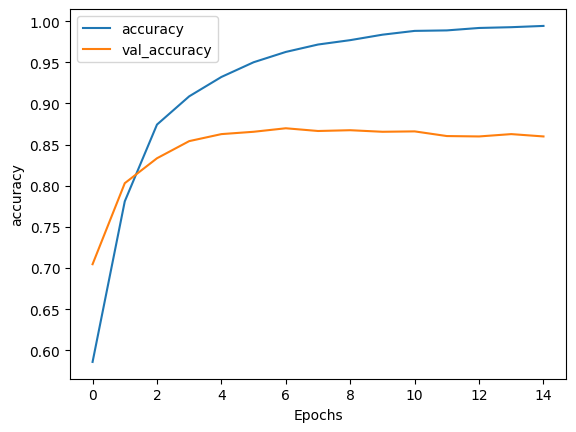

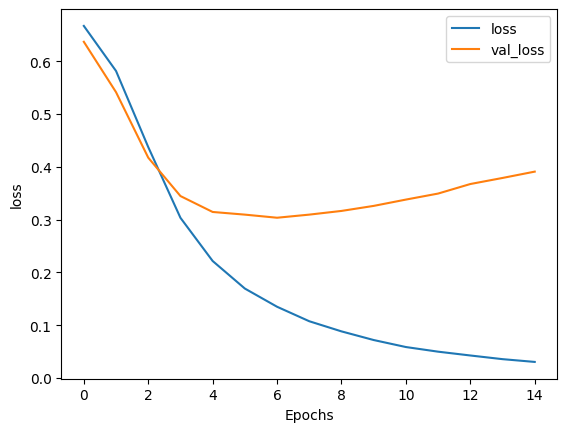

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 56, 1000)          11613000  
                                                                 
 dropout_4 (Dropout)         (None, 56, 1000)          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 52, 32)            160032    
                                                                 
 global_max_pooling1d_2 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                      

In [ ]:
import matplotlib.pyplot as plt

def show_model_summary(model):
    """
    Display the summary of the model's architecture and parameters.

    Args:
        model (tf.keras.models.Sequential): Keras sequential model.

    Returns:
        None
    """
    model.summary()

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Call the function with your model
show_model_summary(model)

Dengan Cross_validation set

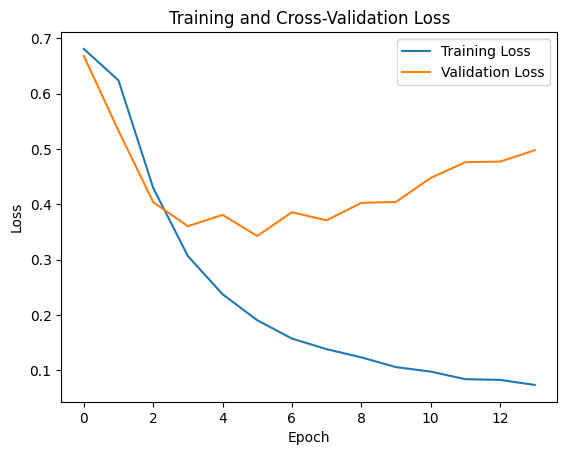

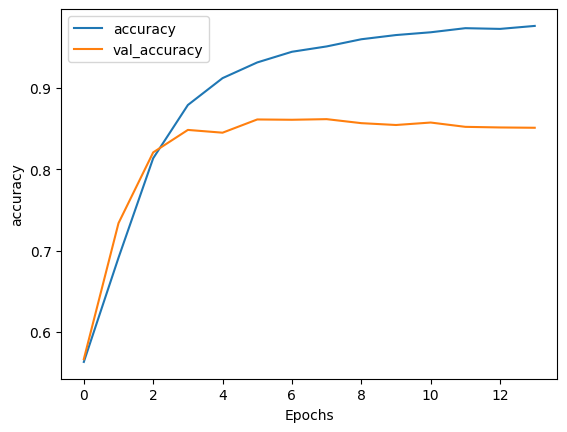

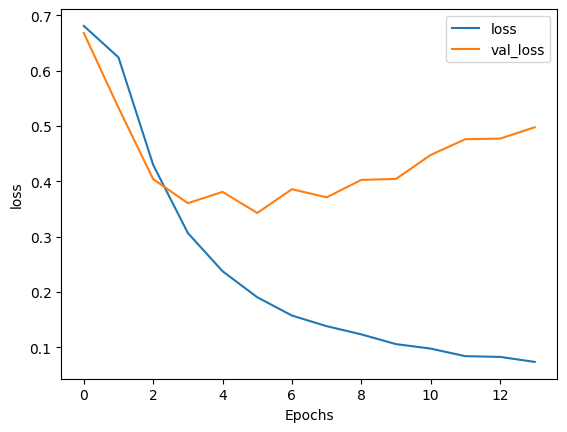

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 1000)          10060000  
                                                                 
 spatial_dropout1d_7 (Spati  (None, 50, 1000)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_7 (Bidirecti  (None, 50, 256)           1156096   
 onal)                                                           
                                                                 
 global_max_pooling1d_7 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                      

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Cross-Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


import matplotlib.pyplot as plt

def show_model_summary(model):
    """
    Display the summary of the model's architecture and parameters.

    Args:
        model (tf.keras.models.Sequential): Keras sequential model.

    Returns:
        None
    """
    model.summary()

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Call the function with your model
show_model_summary(model)


In [ ]:
from google.colab import drive
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
drive.mount('/content/drive')

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
# Read the content of 'sentences.txt' and split it into lines

with open('sentences.txt', 'r', encoding='utf-8') as file:
    tokenizer_sentences = file.read().splitlines()
tokenizer.fit_on_texts(tokenizer_sentences)


from keras.models import load_model
# Load the best-performing model
model_path = '/content/drive/MyDrive/sentimen_analysis3.0.h5'
model = load_model(model_path)

# Load the best weights from the checkpoint
#model.load_weights('best_model.h5')

# Now, for prediction on new text:
new_text = "kontol"
max_length = 56
print("Max Length:", max_length)

# Tokenize and pad the new text
new_sequence = tokenizer.texts_to_sequences([new_text])
new_padded_sequence = pad_sequences(new_sequence, maxlen=max_length, padding='post')

# Make predictions
prediction = model.predict(new_padded_sequence)

# Extract the scalar value from the NumPy array
confidence = prediction[0, 0]

# Threshold for considering a label as positive
threshold = 0.5

# Interpret prediction
predicted_class = 1 if confidence >= threshold else 0

# Convert confidence to a format that can be handled by format method
confidence_str = '{:.4f}'.format(confidence)

print(f"Predicted Class: {predicted_class} (Confidence: {confidence_str})")

#multi text-classification
# Interpret predictions for each label
#labels = ["labels_HS", "labels_Abusive", "labels_HS_Individual", "labels_HS_Group",
#          "labels_HS_Religion", "labels_HS_Race", "labels_HS_Physical", "labels_HS_Gender"]

#for label, prediction in zip(labels, predictions[0]):
#    predicted_class = 1 if prediction >= threshold else 0
#    print(f"{label}: {predicted_class} (Confidence: {prediction:.4f})")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Max Length: 56


1/1 [==============================] - 2s 2s/step
Predicted Class: 1 (Confidence: 0.9449)


83/83 [==============================] - 0s 3ms/step
Confusion Matrix:
[[1050  152]
 [ 189 1251]]


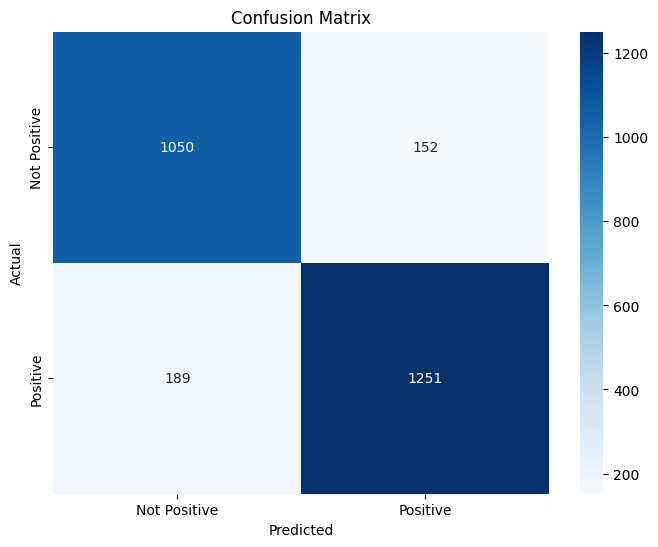


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1202
           1       0.89      0.87      0.88      1440

    accuracy                           0.87      2642
   macro avg       0.87      0.87      0.87      2642
weighted avg       0.87      0.87      0.87      2642



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


# Assuming 'model' is your trained model
# 'X_test_padded' is your padded test data

# Make predictions on the test data
y_pred_probs = model.predict(X_test_padded)

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
threshold = 0.5
y_pred_binary = (y_pred_probs > threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Positive", "Positive"], yticklabels=["Not Positive", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calculate and print precision, recall, and F1-score for each class
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_binary))


unsupervised machine learning

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
# Convert labels to binary classification (positive or not)
y_train_binary = (np.sum([labels_HS, labels_Abusive, labels_HS_Individual, labels_HS_Group,
                          labels_HS_Religion, labels_HS_Race, labels_HS_Physical, labels_HS_Gender], axis=0) > 0).astype(int)

y_test_binary = (np.sum([test_labels_HS, test_labels_Abusive, test_labels_HS_Individual, test_labels_HS_Group,
                         test_labels_HS_Religion, test_labels_HS_Race, test_labels_HS_Physical, test_labels_HS_Gender], axis=0) > 0).astype(int)

# Tokenize the sentences
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)

X_train = tokenizer.texts_to_sequences(sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Pad sequences to ensure consistent length
max_length = 56  # Adjust based on your data
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=max_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=max_length)


In [ ]:
# Method 1: Ensemble Methods (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_padded, y_train_binary)
rf_predictions = rf_model.predict(X_test_padded)
rf_accuracy = accuracy_score(y_test_binary, rf_predictions)
rf_report = classification_report(y_test_binary, rf_predictions)
print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)

Random Forest Model:
Accuracy: 0.6589704769114307
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.49      0.57      1202
           1       0.65      0.80      0.72      1440

    accuracy                           0.66      2642
   macro avg       0.66      0.65      0.64      2642
weighted avg       0.66      0.66      0.65      2642



In [ ]:
# Method 2: Cost-Sensitive Learning (Logistic Regression with class_weight)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_padded, y_train_binary)
lr_predictions = lr_model.predict(X_test_padded)
lr_accuracy = accuracy_score(y_test_binary, lr_predictions)
lr_report = classification_report(y_test_binary, lr_predictions)
print("\nLogistic Regression with Class Weight:")
print("Accuracy:", lr_accuracy)
print("Classification Report:\n", lr_report)


Logistic Regression with Class Weight:
Accuracy: 0.560560181680545
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.62      0.56      1202
           1       0.62      0.51      0.56      1440

    accuracy                           0.56      2642
   macro avg       0.57      0.57      0.56      2642
weighted avg       0.57      0.56      0.56      2642



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Anomaly detection

In [ ]:
# Method 3: Anomaly Detection (One-Class SVM)
# We train the model only on the majority class (negative class)
svm_model = OneClassSVM(kernel='linear', nu=0.01)  # Adjust nu based on your problem
svm_model.fit(X_train_padded[y_train_binary == 0])
svm_predictions = svm_model.predict(X_test_padded)
svm_predictions[svm_predictions == 1] = 0  # Map predicted positives to 0 (majority class)
svm_predictions[svm_predictions == -1] = 1  # Map predicted anomalies to 1 (minority class)
svm_accuracy = accuracy_score(y_test_binary, svm_predictions)
svm_report = classification_report(y_test_binary, svm_predictions)
print("\nOne-Class SVM (Anomaly Detection):")
print("Accuracy:", svm_accuracy)
print("Classification Report:\n", svm_report)


One-Class SVM (Anomaly Detection):
Accuracy: 0.45155185465556397
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.99      0.62      1202
           1       0.24      0.00      0.01      1440

    accuracy                           0.45      2642
   macro avg       0.34      0.50      0.31      2642
weighted avg       0.33      0.45      0.29      2642



In [ ]:
from google.colab import files

# Save the best model checkpoint to a file
files.download('best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install TensorFlow.js converter
!pip install tensorflowjs

# Convert the Keras model to TensorFlow.js format
!tensorflowjs_converter --input_format=keras best_model.h5 tfjs_model

# Zip the converted model for easy download
!zip -r tfjs_model.zip tfjs_model

# Download the zipped model
from google.colab import files
files.download('tfjs_model.zip')
